In [8]:
%load_ext autoreload
%autoreload 2
from src.datasets.dataset import FoodDataset, get_image_transforms
import pandas as pd
from conf import Config
from src.utils import plot_images
from torch.utils.data import DataLoader
from src.datasets.collate_fn import collate_fn
from functools import partial
from transformers import AutoTokenizer
from src.multimodal_train import train

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.5418272..1.5498475].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.5003501..1.5498475].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.558952..1.4365578].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.5332649..1.3929847].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.558952..1.8199999].


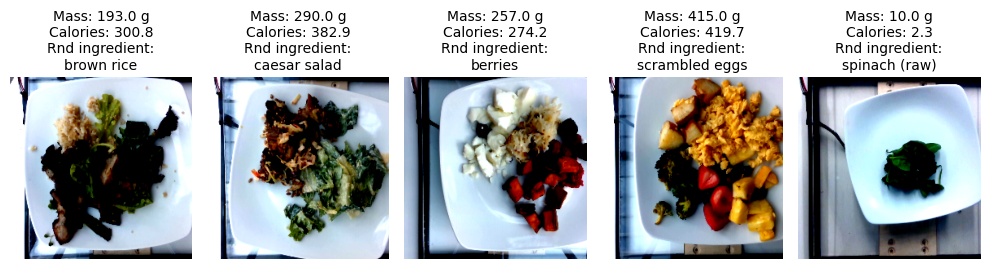

In [12]:
config = Config()

img_dataset_path = 'data/images'
dish_dataset_path = 'data/didh.csv'
ingr_dataset_path = 'data/ingredients.csv'

# Инициализация датасетов
df_dish = pd.read_csv("data/dish.csv")
df_train = df_dish[df_dish["split"] == "train"]
df_test  = df_dish[df_dish["split"] == "test"]

df_ingr = pd.read_csv("data/ingredients.csv")

train_dataset = FoodDataset(df_dish=df_train,
                       df_ingr=df_ingr,
                       transforms=get_image_transforms(config, 'train'))

val_dataset = FoodDataset(df_dish=df_test,
                       df_ingr=df_ingr,
                       transforms=get_image_transforms(config, 'test'))

plot_images(dataset=val_dataset)

In [13]:
tokenizer = AutoTokenizer.from_pretrained(config.TEXT_MODEL_NAME)

train_loader = DataLoader(
    train_dataset,
    batch_size=config.BATCH_SIZE,
    shuffle=True,
    collate_fn=partial(collate_fn, tokenizer=tokenizer))
val_loader = DataLoader(
    val_dataset,
    batch_size=config.BATCH_SIZE,
    shuffle=False,
    collate_fn=partial(collate_fn, tokenizer=tokenizer))

In [16]:
train(config=config, 
      train_loader=train_loader, 
      val_loader=val_loader)

KeyboardInterrupt: 